# House Prices Project

### Data Analysis

In [7]:
from bigml.api import BigML
import numpy as np
from pandas import DataFrame, read_csv, get_dummies
import kaggle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

In [8]:
# Load datasets

train = read_csv('./train.csv')
test = read_csv('./test.csv')

Let's take a look at our data:

In [9]:
# Train has 1460 rows and 81 columns, Test has 1459 and 80 columns

description = train.describe(include='all')
description

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [10]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# We have two types of features

numeric_features = train.select_dtypes(include=[np.number])
categorical_features = train.select_dtypes(include = ['object'])

print(f'Num: {numeric_features.columns} \n \n Cat: {categorical_features.columns}')

Num: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 
 
 Cat: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
     

In [12]:
print("Skewness:", train.SalePrice.skew())
print("Kurtosis:", train.SalePrice.kurt())

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


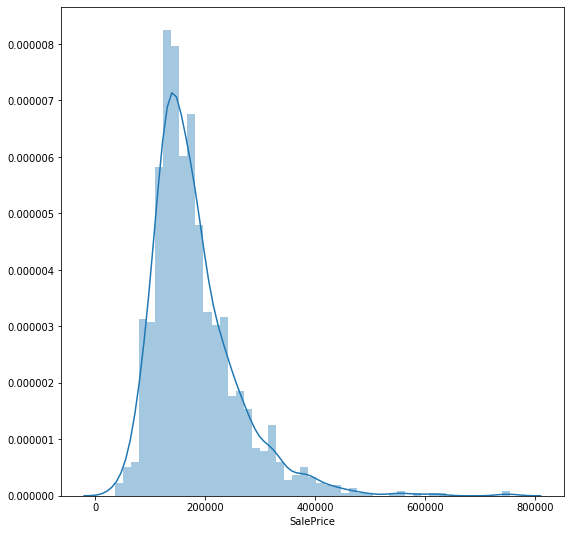

In [13]:
# The distribution is not Gaussian so we are gonna use the log of saleprice

plt.figure(figsize=(9,9))
sns.distplot(train['SalePrice'])

plt.show()

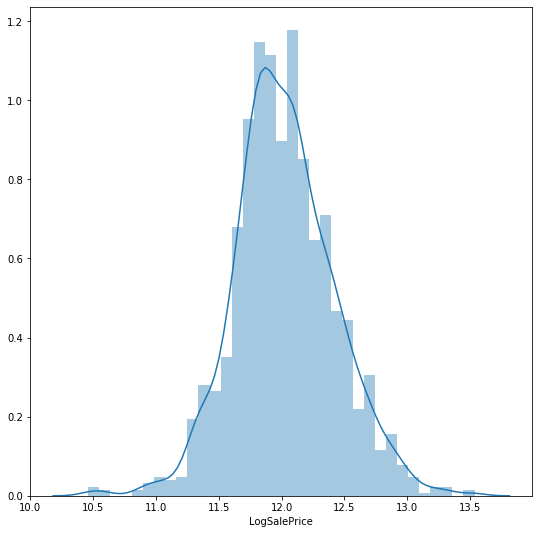

In [14]:
plt.figure(figsize=(9,9))
logSalePrice = np.log1p(train['SalePrice'])
x = pd.Series(logSalePrice, name="LogSalePrice")
sns.distplot(x)

plt.show()

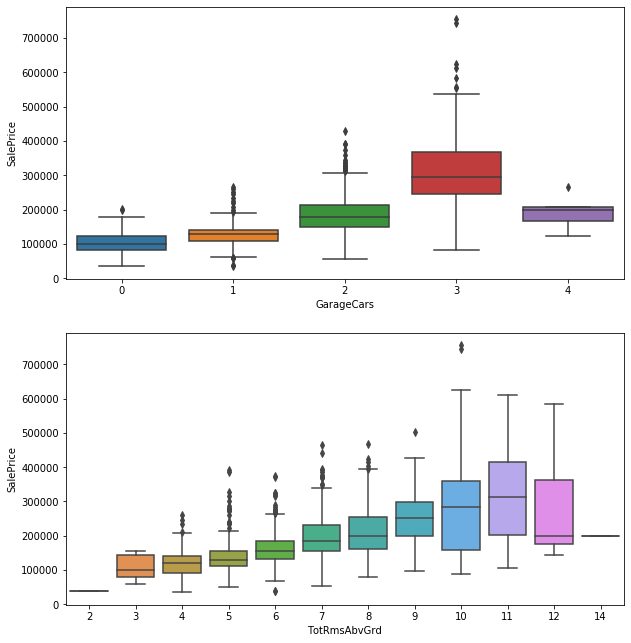

In [15]:
fig = plt.figure(figsize=(10,11))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Garage Cars

sns.boxplot(x = train['GarageCars'], y = train['SalePrice'], ax=ax1)

# TotRmsAbvGrd

sns.boxplot(x = train['TotRmsAbvGrd'], y = train['SalePrice'], ax=ax2)

plt.show()

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


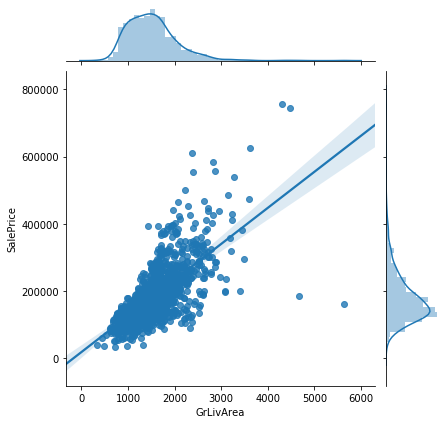

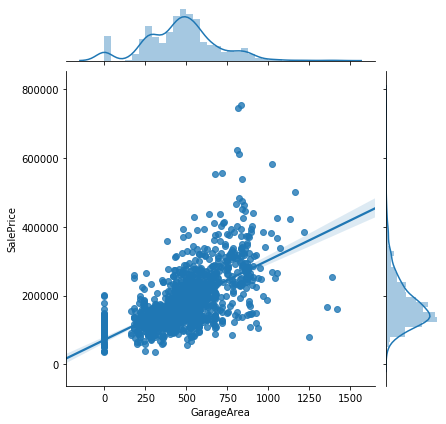

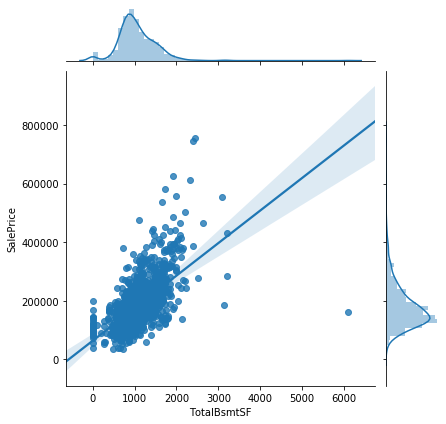

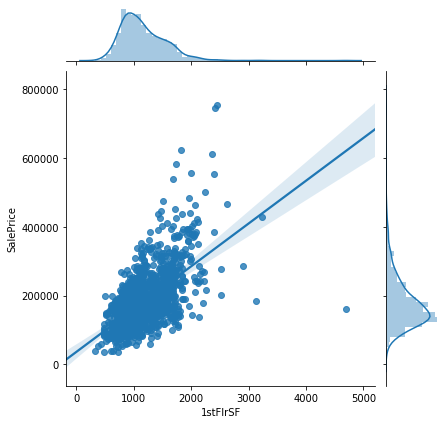

In [16]:
# GrLivArea

sns.jointplot(x=train['GrLivArea'], y = train['SalePrice'], kind='reg')

# GarageArea

sns.jointplot(x=train['GarageArea'], y = train['SalePrice'], kind='reg')

# TotalBsmntSF

sns.jointplot(x=train['TotalBsmtSF'], y = train['SalePrice'], kind='reg')

# 1stFlr

sns.jointplot(x=train['1stFlrSF'], y = train['SalePrice'], kind='reg')

plt.show()

The correlation matrix gives us good information about which features are interesting to keep and to drop

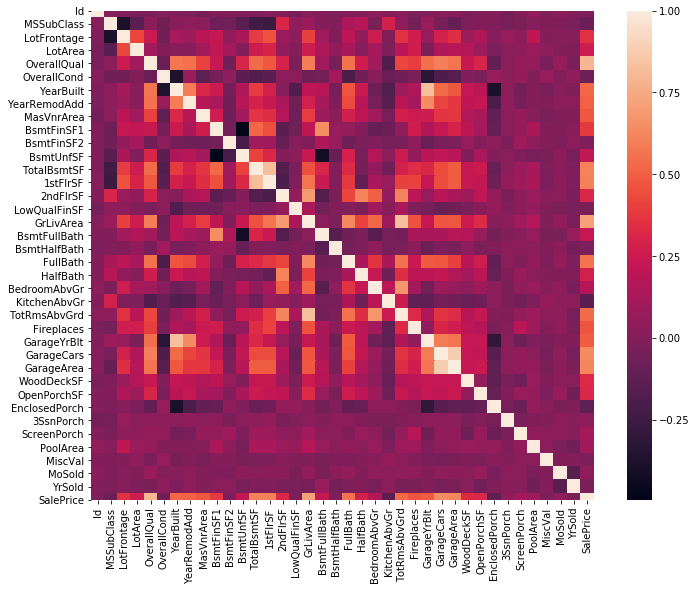

In [17]:
corr = numeric_features.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr, vmax = 1, square = True)

In [18]:
# The top 10 more correlated features to SalePrice

print(corr['SalePrice'].sort_values(ascending=False)[:10], '\n')

# The top 10 less correlated features to SalePrices

print(corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


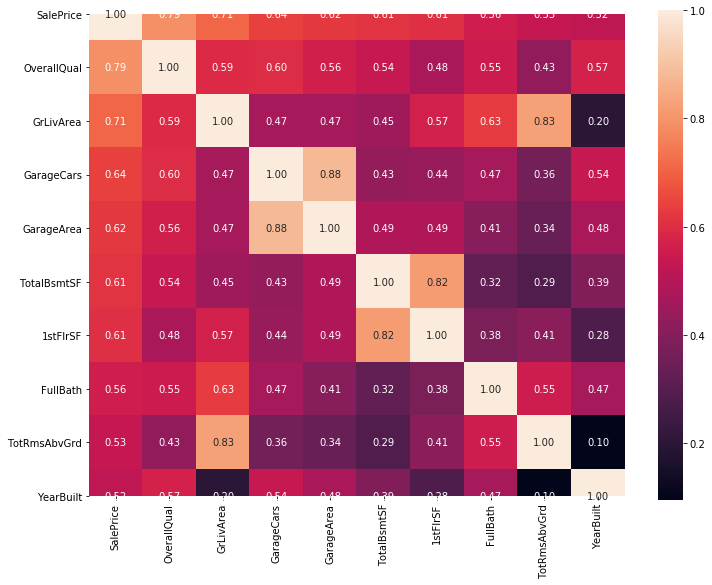

In [19]:
# Correlation Matrix with the 10 most correlated

k = 10
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
most_corr = train[cols].corr()

f, ax = plt.subplots(figsize = (12, 9))
most_corr_heatmap = sns.heatmap(most_corr, 
                             annot = True, 
                             square = True, 
                             fmt = '.2f', 
                             annot_kws = {'size': 10},
                             yticklabels = cols.values,
                             xticklabels = cols.values
                            )

There are features we can drop because of their high correlation:
- TotRmsAbvGrd and GrLivArea - **TotRmsAbvGrd dropped**
- TotalBsmtSF and 1stFlrSF - **1stFlrSF dropped**
- GarageCars and GarageArea - **GarageCars dropped**

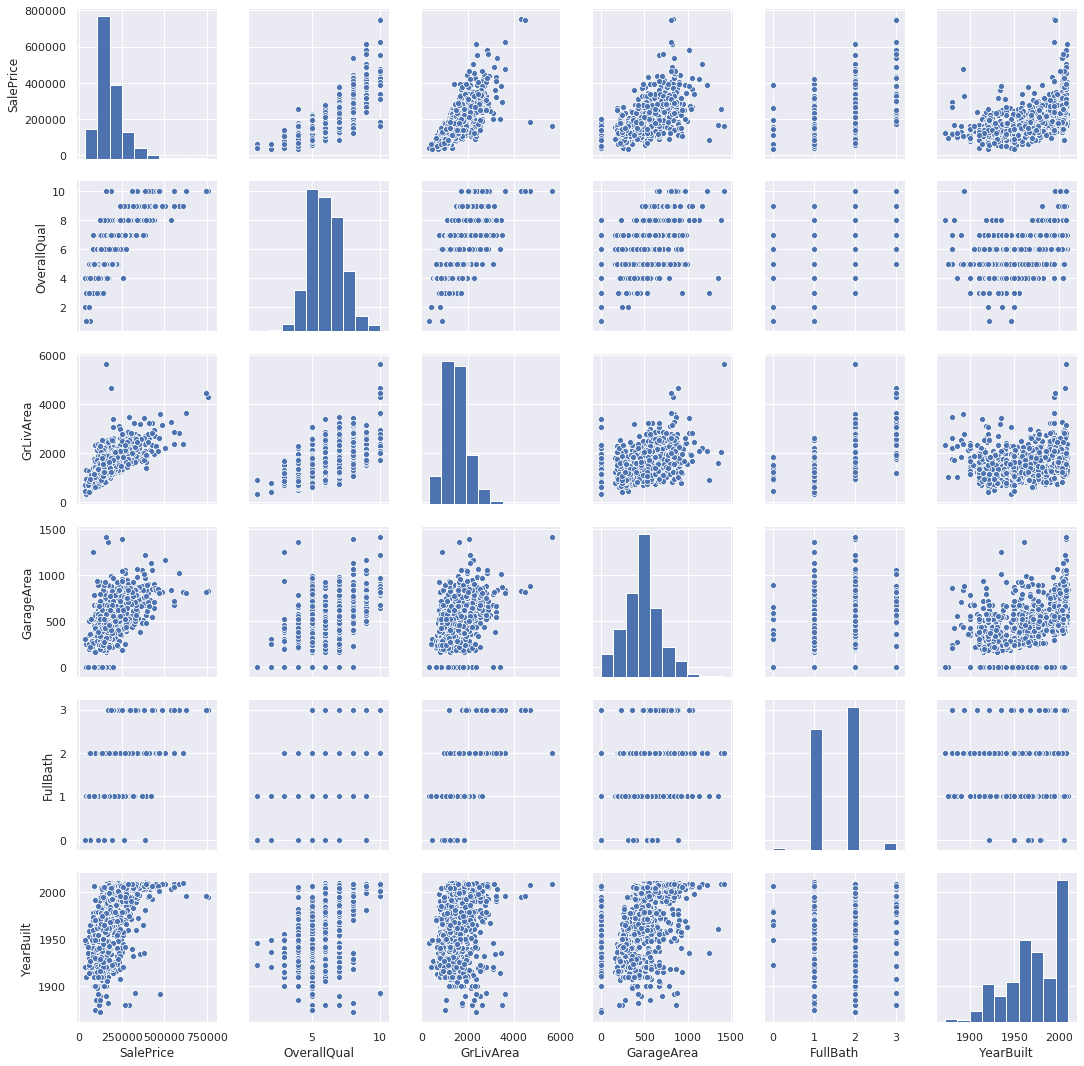

In [20]:
# Scatterplot of features which are the most correlated

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea',
        'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show();

### Data Cleaning

In [21]:
# Remove outliers where GarageArea > 1200 and SalePrice < 300000

train = train.drop(train[(train['GarageArea'] > 1200) & (train['SalePrice'] < 300000)].index).reset_index(drop=True)

# There are two points where GrLivArea > 4000 and SalePrice < 200 000)

train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index).reset_index(drop=True)

train.shape

(1455, 81)

Both train and test datasets have a lot of null values, we are not going to delete all the columns which countain NaN. 
Null values have meanings as well. For example, Null values for "GarageType" mean No Garage.

In [22]:
combine_df = pd.concat([train.drop(['SalePrice'], axis=1), test], axis=0)
pd.set_option('display.max_rows', combine_df.shape[0]+1) # Allows us to see all rows

nulls = pd.DataFrame(combine_df.isnull().sum().sort_values(ascending=False)[:34])
nulls.columns = ['NaN']
nulls.index.name = 'Features'
nulls

,NaN
Features,
PoolQC,2905
MiscFeature,2810
Alley,2716
Fence,2343
FireplaceQu,1419
LotFrontage,485
GarageCond,159
GarageQual,159
GarageYrBlt,159


In [23]:
# We drop the columns which are too correlated

combine_df = combine_df.drop(['TotRmsAbvGrd'], axis=1)
combine_df = combine_df.drop(['1stFlrSF'], axis=1)
combine_df = combine_df.drop(['GarageCars'], axis=1)

In [24]:
# Fill up 'MSZoning' with the mode value (the value that appears the most often)

combine_df['MSZoning'] = combine_df['MSZoning'].fillna(combine_df['MSZoning'].mode()[0])

# For the feature 'LotFrontage' we can fill in missing values by the median 

combine_df["LotFrontage"] = combine_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# From the data description file, NA = No Alley Access

combine_df["Alley"] = combine_df["Alley"].fillna("None")

# Fill up NA values with mode
    
combine_df['Utilities'] = combine_df['Utilities'].fillna(combine_df['Utilities'].mode()[0])

# since both Exterior1st and 2nd only has 2 missing values, substitute with mode

combine_df['Exterior1st'] = combine_df['Exterior1st'].fillna(combine_df['Exterior1st'].mode()[0])
combine_df['Exterior2nd'] = combine_df['Exterior2nd'].fillna(combine_df['Exterior2nd'].mode()[0])

# Fill up MasVnrType with the mode value

combine_df["MasVnrType"] = combine_df["MasVnrType"].fillna(combine_df['MasVnrType'].mode()[0])
combine_df["MasVnrArea"] = combine_df["MasVnrArea"].fillna(combine_df['MasVnrArea'].mode()[0])

# for these columns, NA = No Basement

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    combine_df[col] = combine_df[col].fillna('None')
    
# for these columns, NA is likely to be 0 due to no basement

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    combine_df[col] = combine_df[col].fillna(0)
    
# Substitue NA value here with mode

combine_df['Electrical'] = combine_df['Electrical'].fillna(combine_df['Electrical'].mode()[0])

combine_df['KitchenQual'] = combine_df['KitchenQual'].fillna(combine_df['KitchenQual'].mode()[0])

# If no value, assume Typ, typical is also mode value

combine_df['Functional'] = combine_df['Functional'].fillna(combine_df['Functional'].mode()[0])

# NA = No Fireplace

combine_df['FireplaceQu'] = combine_df['FireplaceQu'].fillna('None')

# For these columns, NA = No Garage

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    combine_df[col] = combine_df[col].fillna('None')
    
# As there is no garage, NA value for this column is set to zero

for col in ('GarageYrBlt', 'GarageArea'):
    combine_df[col] = combine_df[col].fillna(0)
    
# NA = no pool

combine_df['PoolQC'] = combine_df['PoolQC'].fillna('None')

# NA = no fence

combine_df['Fence'] = combine_df['Fence'].fillna('None')

# Misc Feature, NA = None

combine_df['MiscFeature'] = combine_df['MiscFeature'].fillna('None')

# Sale type, only have 1 NA value. substitute it with mode value

combine_df['SaleType'] = combine_df['SaleType'].fillna(combine_df['SaleType'].mode()[0])

In [25]:
nulls = pd.DataFrame(combine_df.isnull().sum().sort_values(ascending=False)[:34])
nulls.columns = ['NaN']
nulls.index.name = 'Features'
nulls

,NaN
Features,
SaleCondition,0
ExterQual,0
YearRemodAdd,0
RoofStyle,0
RoofMatl,0
Exterior1st,0
Exterior2nd,0
MasVnrType,0
MasVnrArea,0


In [26]:
combine_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,...,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000
mean,1460.906658,57.112217,69.406829,10128.200755,6.087509,5.566232,1971.291352,1984.254633,100.879204,438.919012,...,471.363075,93.575154,47.291009,23.137955,2.606726,16.089911,2.090940,50.721002,6.213452,2007.792725
std,843.122081,42.474217,21.191130,7798.584415,1.405287,1.113182,30.286886,20.887641,178.071569,444.059991,...,213.086144,126.412139,67.141235,64.292224,25.209546,56.228619,34.579098,567.807459,2.713410,1.315727
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,731.250000,20.000000,60.000000,7473.000000,5.000000,5.000000,1953.250000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1462.500000,50.000000,70.000000,9450.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,...,479.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2190.750000,70.000000,80.000000,11546.250000,7.000000,6.000000,2001.000000,2004.000000,162.750000,732.750000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [27]:
# We split the data to save our modifications into csv for other models

trainModif = combine_df[:train.shape[0]]
testModif = combine_df[train.shape[0]:]

In [28]:
trainModif['SalePrice'] = train['SalePrice']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
trainModif.to_csv('trainModif.csv', index=0)
testModif.to_csv('testModif.csv', index=0)

### Machine Learning

In [23]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

y = np.log(trainModif.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [24]:
# Split into train set and validation set

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
                          X, y, random_state=42, test_size=.33)

In [25]:
X_test = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [26]:
# Feature scaling

scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
scaler_y.fit(y_train.values.reshape(-1,1))
y_train = scaler_y.transform(y_train.values.reshape(-1,1))
y_val = scaler_y.transform(y_val.values.reshape(-1,1))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [27]:
seed = 7
np.random.seed(seed)
input_dim = X_train.shape[1]

# Model

model = Sequential()
model.add(Dense(200, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=50, batch_size=5)

Train on 974 samples, validate on 481 samples
Epoch 1/50
974/974 [==============================] - 0s 323us/step - loss: 0.0079 - val_loss: 0.0022
Epoch 2/50
974/974 [==============================] - 0s 256us/step - loss: 0.0025 - val_loss: 0.0022
Epoch 3/50
974/974 [==============================] - 0s 246us/step - loss: 0.0023 - val_loss: 0.0021
Epoch 4/50
974/974 [==============================] - 0s 294us/step - loss: 0.0022 - val_loss: 0.0020
Epoch 5/50
974/974 [==============================] - 0s 272us/step - loss: 0.0021 - val_loss: 0.0033
Epoch 6/50
974/974 [==============================] - 0s 244us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 7/50
974/974 [==============================] - 0s 247us/step - loss: 0.0019 - val_loss: 0.0022
Epoch 8/50
974/974 [==============================] - 0s 244us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 9/50
974/974 [==============================] - 0s 238us/step - loss: 0.0019 - val_loss: 0.0037
Epoch 10/50
974/974 [===============

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               7400      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 7,601
Trainable params: 7,601
Non-trainable params: 0
_________________________________________________________________


### Visualisation

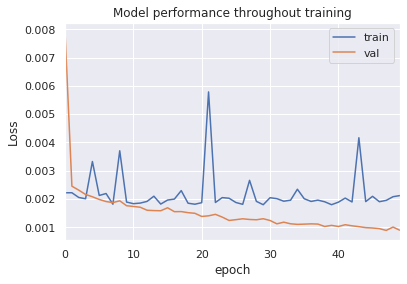

In [29]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### Submission

In [32]:
predictions = model.predict(X_test)
inverse_transform_predictions = scaler_y.inverse_transform(predictions)
final_predictions = np.exp(inverse_transform_predictions)

# We only care of the Id and the SalePrice for the Kaggle challenge
sub = DataFrame() # We create a dataframe for kaggle
sub['Id'] = testModif['Id']
sub['SalePrice'] = final_predictions
sub.to_csv("submission1.csv", index=False)

sub.head()

,Id,SalePrice
0,1461,128555.171875
1,1462,118344.085938
2,1463,181731.703125
3,1464,188928.906250
4,1465,187686.718750


In [36]:
kaggle.api.competition_submit('submission1.csv', "Neural Network", "house-prices-advanced-regression-techniques")

# KaggleScore = 0.14657
# 0.16830 avec DeepNet de BigML

100%|██████████| 21.2k/21.2k [00:03<00:00, 6.01kB/s]


[{'ref': 13875314,
  'totalBytes': 21670,
  'date': '2019-12-20T19:31:43.717Z',
  'description': 'Neural Network',
  'errorDescription': None,
  'fileName': 'submission1.csv',
  'publicScore': None,
  'privateScore': None,
  'status': 'pending',
  'submittedBy': 'Corantin O',
  'submittedByRef': 'corantino',
  'teamName': 'Corantin O',
  'type': 'standard',
  'url': 'https://www.kaggle.com/submissions/13875314/13875314.raw'},
 {'ref': 13706991,
  'totalBytes': 34430,
  'date': '2019-12-09T16:33:06.81Z',
  'description': None,
  'errorDescription': None,
  'fileName': 'submission_kaggle_lr2.csv',
  'publicScore': '0.21880',
  'privateScore': None,
  'status': 'complete',
  'submittedBy': 'Corantin O',
  'submittedByRef': 'corantino',
  'teamName': 'Corantin O',
  'type': 'standard',
  'url': 'https://www.kaggle.com/submissions/13706991/13706991.raw'},
 {'ref': 13601536,
  'totalBytes': 24633,
  'date': '2019-12-03T14:33:17.25Z',
  'description': '',
  'errorDescription': None,
  'fileNa